**Nome:** Iran Freitas Ribeiro

**Matrícula:** 2021241588

**Disciplina:** TEI - Estatística Aplicada

**Professor:** Celso José Munaro

Gere uma variável aleatória X com distribuição uniforme com 1000 amostras e intervalo [a,b] de sua escolha.

In [1]:
from scipy.stats import norm, uniform
import numpy as np
import seaborn as sns
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
sns.set_theme()

In [19]:
# para fins de reprodutibilidade
np.random.seed(42)

In [23]:
# variavel aleatoria
a = 0.0
b = 3.0
X1 = np.random.uniform(low=a, high=b, size=1000)

**1. Selecione aleatoriamente $20$ amostras de $X$ e construa o intervalo de confiança para a média com $\alpha=5$%. Considere a variância conhecida, obtida da população de $1000$ amostras. Repita este procedimento e construa $50$ intervalos para a média. Plote os intervalos das médias junto com a média de $X$ e comente os resultados que obteve, comparando os intervalos estimados e verificando se eles contêm a média conhecida da população.**

In [71]:
# seleciono 20 valores aleatoriamente
sampleX1 = np.random.choice(X1, size=20)
muX1 = sampleX1.mean()
x1 = sorted(sampleX1)

A Figura $1$ apresenta o intervalo de confiança para as 20 amostras selecionadas aleatoriamente. A região sombreada em vermelho representa os valores abaixo e acima do intervalo de confiança. Pela figura nota-se que o intervalo de confiança cobre boa parte da distribuição da amostra, entretanto, por ser calculado apartir de uma única amostra.

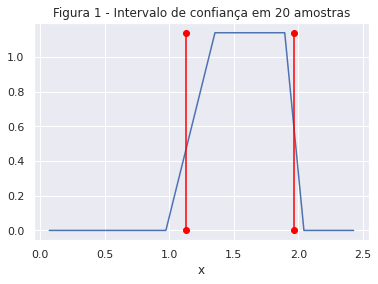

In [72]:
figcount = 1
fig, ax = plt.subplots()
# calcula intervalo de confiança
ci = uniform.interval(0.95, loc=muX1, scale=X1.std())
pdf_1 = uniform.pdf(x1, loc=muX1, scale=X1.std())
ax.plot(x1, pdf_1, 'b')

ie = [ci[0],ci[0]]
id = [ci[1],ci[1]]
ye = [0,np.max(pdf_1)]
ax.plot(ie,ye,marker='o', color='red')
ax.plot(id,ye,marker='o', color='red')
ax.set_title("Figura {} - Intervalo de confiança em 20 amostras".format(figcount))
ax.set_xlabel("x");
figcount+=1

In [74]:
n = 50
n_intervalos_1 = []
cnts=0
muPop = X1.mean()
amostras_X1 = [np.random.choice(X1, size=20) for _ in range(n)]
for i in range(n):
    ci = uniform.interval(0.95, loc=amostras_X1[i].mean(), scale=X1.std())
    n_intervalos_1.append(ci)

A Figura 2 mostra que, dos intervalos calculados, $29$ ($\approx 58\%$) não contém a média populacional. Caso a distribuição fosse normal, esse valor deveria ser menor, já que utilizamos um $\alpha$ de $5\%$ ($95\%$ de confiança). Essa suposição pode ser verificada na questão $4$.

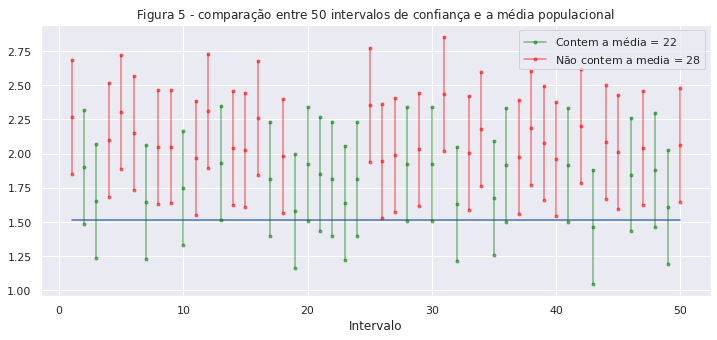

In [78]:
fig, ax = plt.subplots(figsize=(12,5))
y = [muPop for _ in range(n)]
intervalos = np.arange(1,51)
ax.plot(intervalos, y)
cnts=0
for i in intervalos:
    ypoints = [n_intervalos_1[i-1][0], np.mean(n_intervalos_1[i-1]), n_intervalos_1[i-1][1]]
    if (muPop>=ypoints[0] and muPop<=ypoints[-1]):
        linha_com_media, = ax.plot([i,i,i], ypoints, marker='.', c='green', alpha=0.5,)
        cnts+=1
    else:
        linha_sem_media, = ax.plot([i,i,i], ypoints, marker='.', c='red', alpha=0.5,)
ax.set_title("Figura {} - comparação entre $50$ intervalos de confiança e a média populacional".format(figcount))
labels = ["Contem a média = ${}$".format(cnts), "Não contem a media = ${}$".format(n-cnts)]
ax.legend([linha_com_media, linha_sem_media], labels)
ax.set_xlabel("Intervalo")
figcount+=1

**2. Plote o histograma cumulativo das $50$ médias calculadas e compare com a cdf teórica da média amostral de $X$.**

In [69]:
# cálculo da média amostral
medias = [xi.mean() for xi in amostras_X1]

Como a distribuição é uniforme, cada média tem a mesma probabilidade de ocorrer ($1$ em $50$), tem-se:

In [46]:
pmedia = 1/50

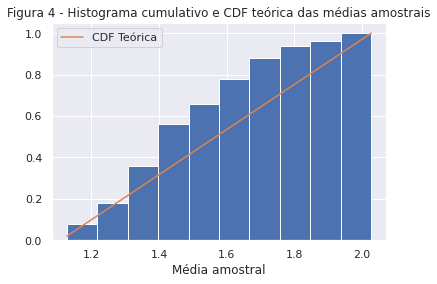

In [77]:
fig, ax = plt.subplots()
x = np.linspace(np.min(medias), np.max(medias), num=50)
probs = [pmedia for _ in range(50)]
cdf = np.cumsum(probs)
ax.hist(medias,cumulative=True, density=True)
ax.plot(x, cdf, label="CDF Teórica")
ax.set_xlabel("Média amostral")
ax.set_title("Figura {} - Histograma cumulativo e CDF teórica das médias amostrais".format(figcount))
ax.legend();
figcount+=1

**3. Repita a atividade $1$ considerando a variância desconhecida e compare os intervalos**

Como a variância é desconhecida, pode-se utilizar a variância amostral. Assim, para o primeiro caso (um único intervalo):

In [48]:
# variavel aleatoria
a = 0.0
b = 3.0
X3 = np.random.uniform(low=a, high=b, size=1000)
# escolhe 20 valores de X aleatoriamente
sampleX_3 = np.random.choice(X3,size=20)
# usa variancia da amostra, nesse caso, desvio padrão p/ obter o intervalo
ci_3uni = uniform.interval(alpha=0.95, loc=sampleX_3.mean(), scale=sampleX_3.std())

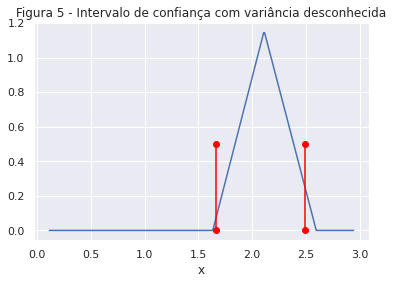

In [51]:
fig, ax = plt.subplots()
x_3 = sorted(sampleX_3)
ax.plot(x_3, uniform.pdf(x_3, loc=sampleX_3.mean(), scale=sampleX_3.std()))
# cnfidence interval left line
one_x12, one_y12 = [ci_3uni[0], ci_3uni[0]], [0, .5]
# cnfidence interval right line
two_x12, two_y12 = [ci_3uni[1], ci_3uni[1]], [0, .5]
ax.plot(one_x12, one_y12, two_x12, two_y12, marker = 'o', color='red')
ax.set_xlabel("x")
ax.set_title("Figura {} - Intervalo de confiança com variância desconhecida".format(figcount))
figcount+=1;

Para o caso dos $50$ intervalos, tem-se:

In [79]:
n = 50
n_intervalos_3 = []
amostras = [np.random.choice(X3, size=20) for i in range(50)]    
std_amostral = np.std(amostras)
muX_3 = X3.mean()
for Xi in amostras:
    ci = uniform.interval(0.95, loc=Xi.mean(), scale=std_amostral)
    n_intervalos_3.append(ci)

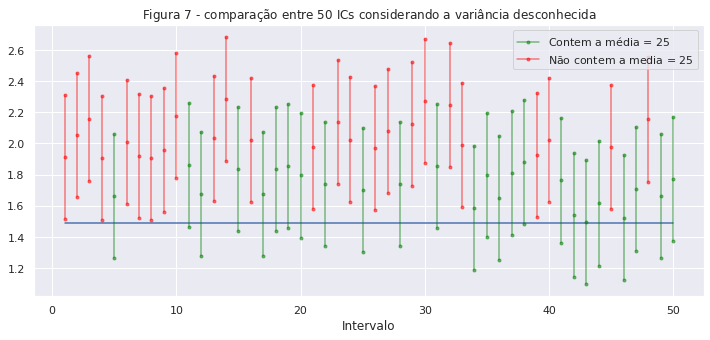

In [81]:
fig, ax = plt.subplots(figsize=(12,5))
y = [muX_3 for _ in range(n)]
intervalos = np.arange(1,51)
ax.plot(intervalos, y)
cnts = 0
for i in intervalos:
    ypoints = [n_intervalos_3[i-1][0], np.mean(n_intervalos_3[i-1]), n_intervalos_3[i-1][1]]
    if (muX_3>=ypoints[0] and muX_3<=ypoints[-1]):
        linha_com_media, = ax.plot([i,i,i], ypoints, marker='.', c='green', alpha=0.5,)
        cnts+=1
    else:
        linha_sem_media, = ax.plot([i,i,i], ypoints, marker='.', c='red', alpha=0.5,)
    #ax.plot([i,i,i], ypoints, marker='.', c='blue', alpha=0.5)
labels = ["Contem a média = ${}$".format(cnts), "Não contem a media = ${}$".format(n-cnts)]
ax.set_xlabel("Intervalo")
ax.legend([linha_com_media, linha_sem_media], labels)
ax.set_title("Figura {} - comparação entre $50$ ICs considerando a variância desconhecida".format(figcount))
figcount+=1;

**4. Repita a atividade $1$ fazendo um intervalo de confiança para a variância da variável $X$ gerada com distribuição normal, média $\mu$ e variância $\sigma$ escolhidas. Faça o histograma das 50 variâncias e analise.**

In [89]:
X = norm.rvs(loc=5.0, scale=1.5, size=1000)

In [90]:
# seleciono 20 valores aleatoriamente
sampleX = np.random.choice(X, size=20)
muX = sampleX.mean()
x = sorted(sampleX)

In [87]:
X.std()

1.4557897007240237

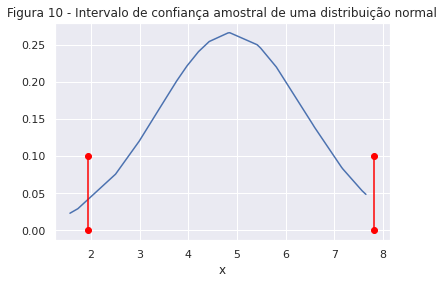

In [91]:
#count, bins, _ = ax.hist(sampleX, density=True)
fig, ax = plt.subplots()
ax.plot(x, norm.pdf(x, loc=muX, scale=1.5))
# cnfidence interval left line
ci = norm.interval(0.95, loc=muX, scale=1.5)
one_x12, one_y12 = [ci[0], ci[0]], [0, .1]
# cnfidence interval right line
two_x12, two_y12 = [ci[1], ci[1]], [0, .1]
ax.plot(one_x12, one_y12, two_x12, two_y12, marker = 'o', color='red')
ax.set_xlabel("x")
ax.set_title("Figura {} - Intervalo de confiança amostral de uma distribuição normal".format(figcount))
figcount+=1

In [82]:
n = 50
n_intervalos_normal = []
cnts=0    
for i in range(n):
    xsample = np.random.choice(X, size=20, replace=False)
    ci = norm.interval(0.95, loc=xsample.mean(), scale=1.5)
    n_intervalos_normal.append(ci)

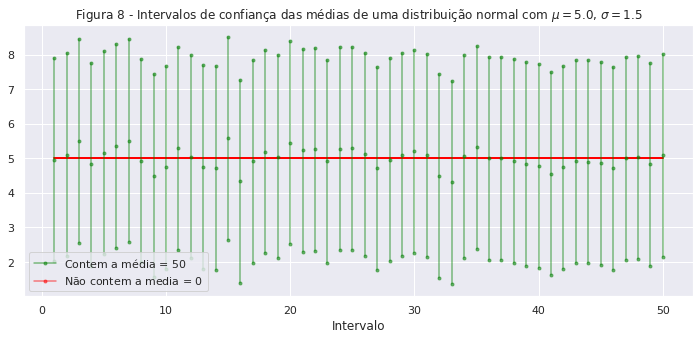

In [83]:
# TODO: explicar essa figura
fig, ax = plt.subplots(figsize=(12,5))
y = [5.0 for _ in range(n)]
intervalos = np.arange(1,51)
ax.plot(intervalos, y,c='red',lw=2)
cnts = 0
for i in intervalos:
    ypoints = [n_intervalos_normal[i-1][0], np.mean(n_intervalos_normal[i-1]), n_intervalos_normal[i-1][1]]
    if (5>=ypoints[0] and 5<=ypoints[-1]):
        linha_com_media, = ax.plot([i,i,i], ypoints, marker='.', c='green', alpha=0.5,)
        cnts+=1
    else:
        linha_sem_media, = ax.plot([i,i,i], ypoints, marker='.', c='red', alpha=0.5,)
    #ax.plot([i,i,i], ypoints, marker='.', c='blue', alpha=0.5)
labels = ["Contem a média = ${}$".format(cnts), "Não contem a media = ${}$".format(n-cnts)]
ax.legend([linha_com_media, linha_sem_media], labels)
ax.set_title("Figura {} - Intervalos de confiança das médias de uma distribuição normal com $\mu={}$, $\sigma={}$".format(figcount, 5.0, 1.5))
ax.set_xlabel("Intervalo")
figcount+-1;

**5. Um fabricante de equipamentos seleciona aleatoriamente $1200$ unidades e verifica que 8 têm defeito**

- 5.1 Construa um intervalo de confiança de 95% para a proporção de unidades com defeito

O problema descreve uma distribuição binomial onde, em $1200$ tentativas, $8$ foram de sucesso (equipamento com defeito). O cálculo do intervalo de confiança para esse cenário pode ser calculado com a função ``proportion_confint`` da Linguagem Python.

In [16]:
from statsmodels.stats.proportion import proportion_confint

In [19]:
ci = proportion_confint(8, 1200)
ci

(0.0020624119343427864, 0.011270921398990549)

O intervalo de confiança é de $0.002$ e $0.011$ para a proporção de unidades com defeito.

- 5.2 Há evidências para suportar a afirmação de que a fração de peças com defeito é menor que 1%?

Não há evidências para suportar esta afirmação, dado que o limite superior do intervalo de confiança passa, ainda que pouco, de $1\%$ ($0.0112$).